### MAT 653
#### Wei Li

## Slice sampling

ref. 2D slice sampler. R.C. Exercise 7.11

#### sample from $f(x)=e^{-\sqrt{x}}/2$

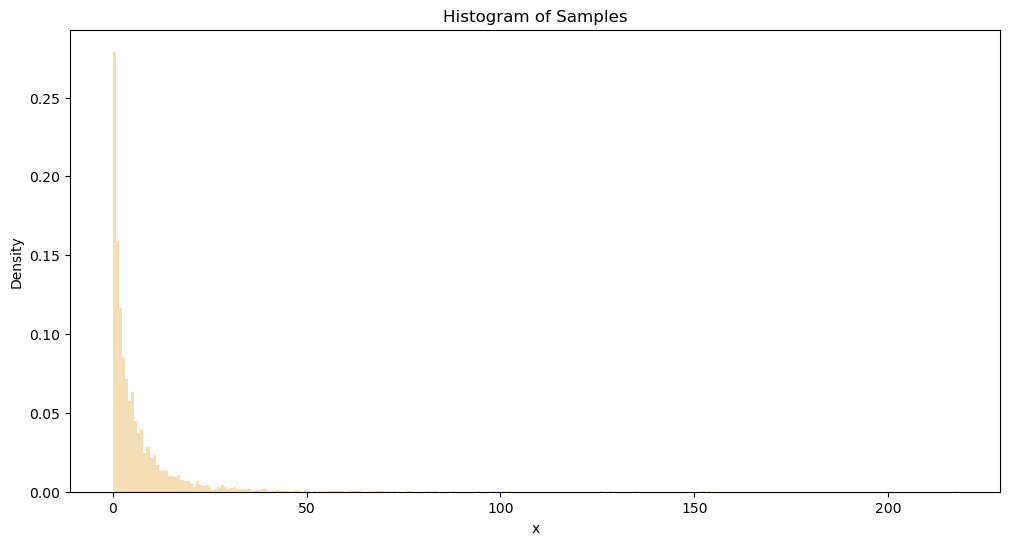

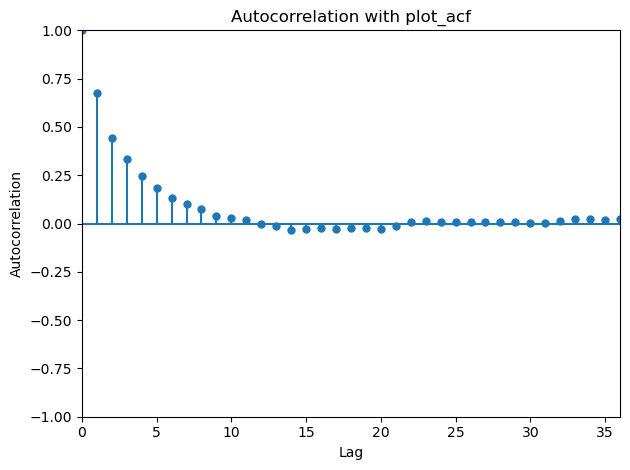

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Sample from f(x) = 1/2 * e^(-sqrt(x))
def f(x):
    return 0.5 * np.exp(-np.sqrt(x))

T = 5000
X = [np.random.uniform()]
U = [np.random.uniform()]

for t in range(T):
    U.append(np.random.uniform(0, f(X[t])))
    X.append(np.random.uniform(0, (np.log(2 * U[t + 1]))**2))

# Number of observations and series for lag calculation
N = len(X)  # number of observations
m = 1       # number of series

# Calculating the maximum lag
lag_max = int(10 * np.log10(N / m))


# Plotting
plt.figure(figsize=(12, 6))

# Histogram
plt.hist(X, bins='auto', density=True, color='wheat')
plt.title("Histogram of Samples")
plt.xlabel("x")
plt.ylabel("Density")

plot_acf(np.array(X), lags=lag_max, use_vlines=True, alpha=None)
plt.xlim(0, lag_max)  # Showing only positive lags
plt.title("Autocorrelation with plot_acf")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")

plt.tight_layout()
plt.show()


#### Example of a 3D slice sampler

$exp(-x^2/2) (1+sin^2 (3x)) (1+cos^4 (5x))$

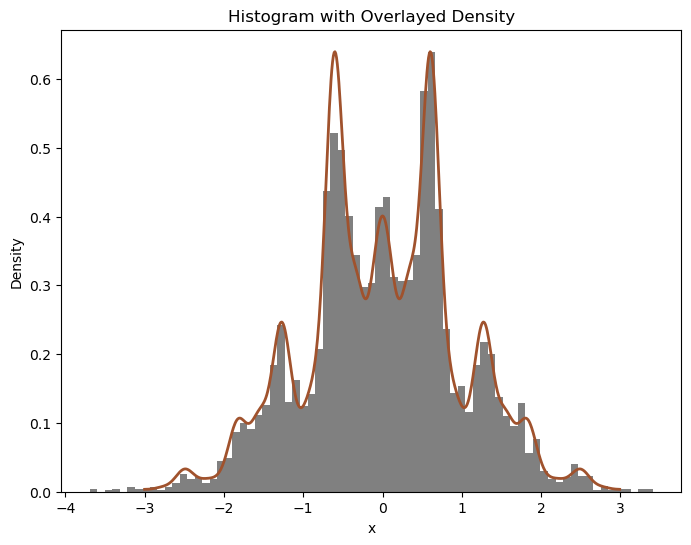

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Translating R code to Python
x = np.zeros(5000)
for i in range(1, 5000):
    omega1 = (1 + np.sin(3 * x[i - 1])**2) * np.random.uniform()
    omega2 = (1 + np.cos(5 * x[i - 1])**4) * np.random.uniform()
    omega3 = np.random.uniform() * np.exp(-x[i - 1]**2 / 2)
    temp = np.sqrt(-2 * np.log(omega3))
    while True:
        y = -temp + 2 * temp * np.random.uniform()  # proposal for x
        if (np.sin(3 * y)**2 > omega1 - 1) and (np.cos(5 * y)**4 > omega2 - 1):
            break
    x[i] = y

# Plotting histogram of the generated samples
plt.figure(figsize=(8, 6))
hist_data, bins, _ = plt.hist(x, bins=75, color="grey", density=True)
# If density=True, return a probability density, so that the area under the histogram integrates to 1
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Histogram with Overlayed Density")

# Overlay the histogram with a (crude) normalized density curve
labs = np.arange(-3, 3, 0.01)
dense = (1 + np.sin(3 * labs)**2) * (1 + np.cos(5 * labs)**4) * np.exp(-labs**2 / 2)
dense_norm = dense * np.max(hist_data) / np.max(dense)

plt.plot(labs, dense_norm, color="sienna", linewidth=2)
plt.show()